In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

In [2]:
movement_data = pd.DataFrame(dtype=float)
movement_data = pd.read_csv("data/cleaned_puryear_movement.csv")

audio_data = pd.DataFrame(dtype=float)
audio_data = pd.read_csv("data/cleaned_puryear_audio.csv")
audio_data.columns = ["Date","Headphone sound levels(dBASPL)"]

sleep_data = pd.DataFrame(dtype=float)
sleep_data = pd.read_csv("data/cleaned_puryear_sleep.csv")
sleep_data.columns = ["Date","Time in bed(hr)"]

# interpolate audio data

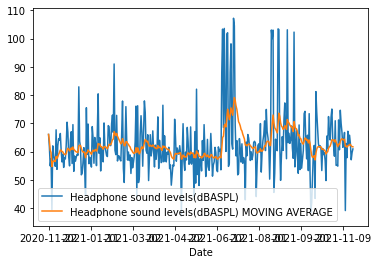

In [3]:
# interpolate audio data
audio_data.mask((audio_data["Headphone sound levels(dBASPL)"] <= 30) & (audio_data["Headphone sound levels(dBASPL)"] <= 100),inplace=True) # filtering out the outliers
audio_data.interpolate(method="cubic",inplace=True)
audio_data.fillna(method="bfill",inplace=True)

audio_data_combined = audio_data.merge(audio_data["Headphone sound levels(dBASPL)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
audio_data_combined.columns=["Date","Headphone sound levels(dBASPL)","Headphone sound levels(dBASPL) MOVING AVERAGE"]

audio_data_combined.set_index("Date",inplace=True)

audio_data_combined.to_csv("data/cleaned_puryear_audio_ewm.csv")

ax = audio_data_combined.plot()
fig = ax.get_figure()
fig.savefig("figures/moving_avg_audio_graph.jpg",dpi=500)

<img src="figures\moving_avg_audio_graph.jpg" width="600"/>

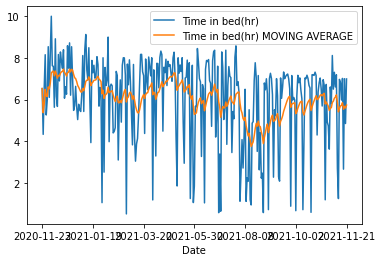

In [4]:
# interpolate sleep data

sleep_data.interpolate(method="cubic",inplace=True)
sleep_data.fillna(method="bfill",inplace=True)

sleep_data_combined = sleep_data.merge(sleep_data["Time in bed(hr)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
sleep_data_combined.columns=["Date","Time in bed(hr)","Time in bed(hr) MOVING AVERAGE"]

sleep_data_combined.set_index("Date",inplace=True)

sleep_data_combined.to_csv("data/cleaned_puryear_sleep_ewm.csv")

ax = sleep_data_combined.plot()
fig = ax.get_figure()
fig.savefig("figures/moving_avg_sleep_graph.jpg",dpi=500)

            Distance walking / running(mi)_x  Distance walking / running(mi)_y
Date                                                                          
2020-11-21                             1.023                          1.023000
2020-11-22                             1.202                          1.117211
2020-11-23                             2.455                          1.610860
2020-11-24                             1.165                          1.481212
2020-11-25                             2.444                          1.716319
...                                      ...                               ...
2021-11-17                             2.624                          2.636803
2021-11-18                             4.532                          2.826323
2021-11-19                             3.492                          2.892890
2021-11-20                             0.507                          2.654301
2021-11-21                             0.004        

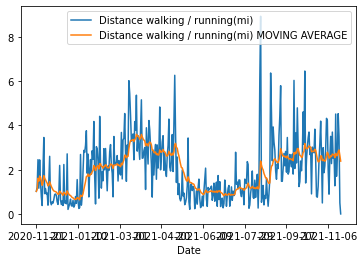

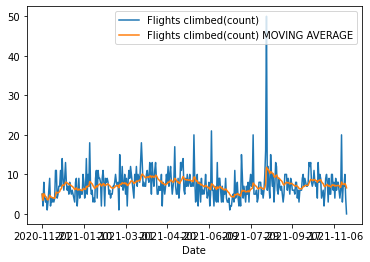

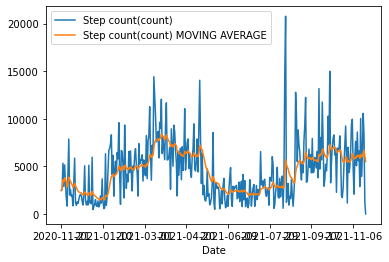

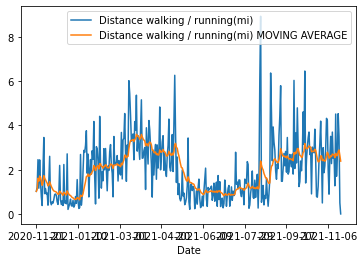

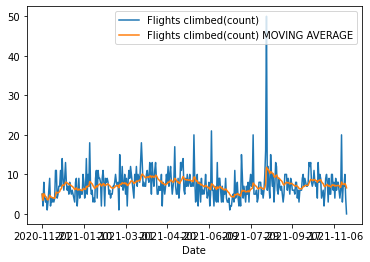

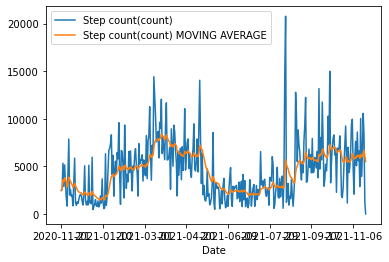

In [7]:
# interpolate movement data

movement_data.interpolate(method="cubic",inplace=True)
movement_data.fillna(method="bfill",inplace=True)

movement_data_combined = movement_data.merge(movement_data["Distance walking / running(mi)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
movement_data_combined = movement_data_combined.merge(movement_data["Flights climbed(count)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
movement_data_combined = movement_data_combined.merge(movement_data["Step count(count)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)

# movement_data_combined.plot(subplots=True)



movement_data_distance = pd.DataFrame(movement_data["Distance walking / running(mi)"])
movement_data_distance.set_index(movement_data["Date"],inplace=True)

movement_data_flights = pd.DataFrame(movement_data["Flights climbed(count)"])
movement_data_flights.set_index(movement_data["Date"],inplace=True)

movement_data_step = pd.DataFrame(movement_data["Step count(count)"])
movement_data_step.set_index(movement_data["Date"],inplace=True)

movement_data_distance_combined = movement_data_distance.merge(movement_data_distance["Distance walking / running(mi)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
movement_data_flights_combined = movement_data_flights.merge(movement_data_flights["Flights climbed(count)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)
movement_data_step_combined = movement_data_step.merge(movement_data_step["Step count(count)"].ewm(alpha=0.1).mean(),left_index=True,right_index=True)

print(movement_data_distance_combined)

movement_data_distance_combined.columns=["Distance walking / running(mi)","Distance walking / running(mi) MOVING AVERAGE"]
movement_data_flights_combined.columns=["Flights climbed(count)","Flights climbed(count) MOVING AVERAGE"]
movement_data_step_combined.columns=["Step count(count)","Step count(count) MOVING AVERAGE"]

movement_data_distance_combined.plot()
movement_data_flights_combined.plot()
movement_data_step_combined.plot()


movement_data_distance_combined.to_csv("data/clean_puryear_movement_distance_ewm.csv")
movement_data_flights_combined.to_csv("data/clean_puryear_movement_flights_ewm.csv")
movement_data_step_combined.to_csv("data/clean_puryear_movement_step_ewm.csv")
#sleep_data_combined.columns=["Date","Time in bed(hr)","Time in bed(hr) MOVING AVERAGE"]
#
#sleep_data_combined.set_index("Date",inplace=True)
#
#sleep_data_combined.to_csv("data/cleaned_puryear_sleep_ewm.csv")
#
#ax = sleep_data_combined.plot()
#fig = ax.get_figure()
#fig.savefig("figures/moving_avg_sleep_graph.jpg",dpi=500)

ax = movement_data_distance_combined.plot()
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_distance_graph.jpg",dpi=500)

ax = movement_data_flights_combined.plot()
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_flights_graph.jpg",dpi=500)

ax = movement_data_step_combined.plot()
fig = ax.get_figure()
fig.savefig("figures/moving_avg_movement_steps_graph.jpg",dpi=500)

eda before hyp testing

eda
